In [2]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 0, 'y-values')

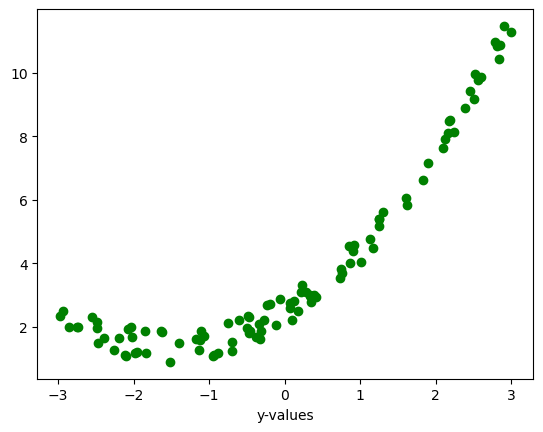

In [3]:
X = 6 * np.random.rand(100,1) - 3
y = 0.5 * X**2 + 1.5 * X + 2 + np.random.rand(100,1)

plt.scatter(X,y,c='g')
plt.xlabel('X-values')
plt.xlabel('y-values')

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [5]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [6]:
reg.fit(X_train,y_train)

LinearRegression()

In [7]:
from sklearn.metrics import r2_score
score = r2_score(y_test, reg.predict(X_test))
print(score)

0.5995919482480151


Text(0, 0.5, 'y_values')

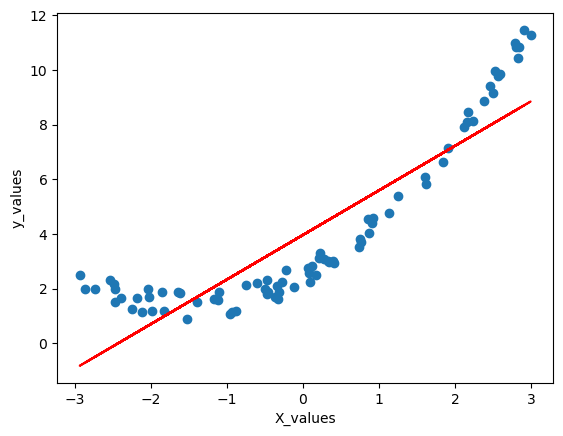

In [11]:
## Visualize the model

plt.plot(X_train, reg.predict(X_train), c='r')
plt.scatter(X_train,y_train)
plt.xlabel('X_values')
plt.ylabel('y_values')

In [12]:
# apply polynomial transformation
from sklearn.preprocessing import PolynomialFeatures

In [13]:
poly = PolynomialFeatures(degree=2, include_bias=True)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [14]:
X_train_poly

array([[ 1.00000000e+00, -3.45411553e-01,  1.19309141e-01],
       [ 1.00000000e+00, -4.66172024e-01,  2.17316356e-01],
       [ 1.00000000e+00,  2.12262836e+00,  4.50555115e+00],
       [ 1.00000000e+00,  2.15868901e+00,  4.65993823e+00],
       [ 1.00000000e+00, -1.52335934e+00,  2.32062367e+00],
       [ 1.00000000e+00, -2.48279921e+00,  6.16429193e+00],
       [ 1.00000000e+00,  9.21774723e-01,  8.49668640e-01],
       [ 1.00000000e+00, -2.86092230e+00,  8.18487643e+00],
       [ 1.00000000e+00, -2.11367300e+00,  4.46761355e+00],
       [ 1.00000000e+00, -1.62077437e+00,  2.62690954e+00],
       [ 1.00000000e+00,  8.66583152e-01,  7.50966359e-01],
       [ 1.00000000e+00, -2.03563744e+00,  4.14381979e+00],
       [ 1.00000000e+00,  2.90941197e+00,  8.46467800e+00],
       [ 1.00000000e+00,  2.38127376e+00,  5.67046470e+00],
       [ 1.00000000e+00,  2.17200454e+00,  4.71760374e+00],
       [ 1.00000000e+00, -2.25251182e+00,  5.07380949e+00],
       [ 1.00000000e+00, -1.12623541e-01

In [15]:
reg2 = LinearRegression()
reg2.fit(X_train_poly,y_train)
y_pred = reg2.predict(X_test_poly)
score2 = r2_score(y_test,y_pred)
print(score2)

0.9730181542643014


In [17]:
print(reg2.coef_)

[[0.         1.50426927 0.50493747]]


In [22]:
print(reg2.intercept_)

[2.49706592]


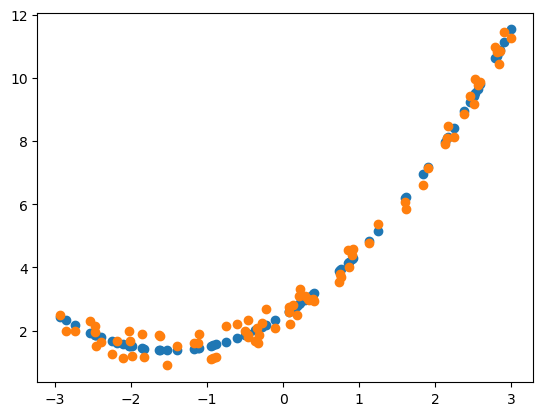

In [21]:
plt.scatter(X_train,reg2.predict(X_train_poly))
plt.scatter(X_train,y_train)

In [23]:
poly = PolynomialFeatures(degree=3, include_bias=True)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [24]:
reg3 = LinearRegression()
reg3.fit(X_train_poly,y_train)
y_pred = reg3.predict(X_test_poly)
score2 = r2_score(y_test,y_pred)
print(score2)

0.9736185934748164


In [25]:
print(reg2.coef_)
print(reg2.intercept_)

[[0.         1.50426927 0.50493747]]
[2.49706592]


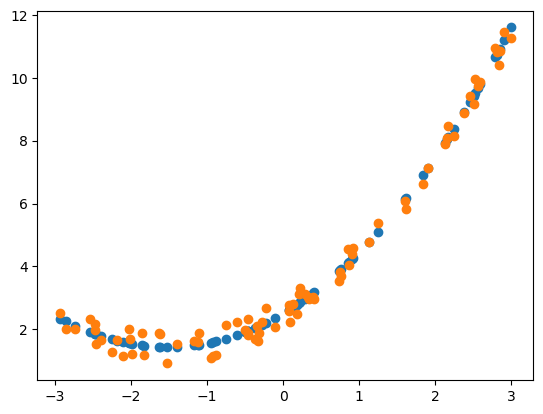

In [26]:
plt.scatter(X_train,reg3.predict(X_train_poly))
plt.scatter(X_train,y_train)

In [28]:
#3 Prediction of new data
X_new = np.linspace(-3,3,200).reshape(200,1)
X_new_poly = poly.transform(X_new)
X_new_poly

array([[ 1.00000000e+00, -3.00000000e+00,  9.00000000e+00,
        -2.70000000e+01],
       [ 1.00000000e+00, -2.96984925e+00,  8.82000455e+00,
        -2.61940839e+01],
       [ 1.00000000e+00, -2.93969849e+00,  8.64182723e+00,
        -2.54043665e+01],
       [ 1.00000000e+00, -2.90954774e+00,  8.46546804e+00,
        -2.46306834e+01],
       [ 1.00000000e+00, -2.87939698e+00,  8.29092700e+00,
        -2.38728702e+01],
       [ 1.00000000e+00, -2.84924623e+00,  8.11820409e+00,
        -2.31307624e+01],
       [ 1.00000000e+00, -2.81909548e+00,  7.94729931e+00,
        -2.24041955e+01],
       [ 1.00000000e+00, -2.78894472e+00,  7.77821267e+00,
        -2.16930052e+01],
       [ 1.00000000e+00, -2.75879397e+00,  7.61094417e+00,
        -2.09970269e+01],
       [ 1.00000000e+00, -2.72864322e+00,  7.44549380e+00,
        -2.03160961e+01],
       [ 1.00000000e+00, -2.69849246e+00,  7.28186157e+00,
        -1.96500486e+01],
       [ 1.00000000e+00, -2.66834171e+00,  7.12004747e+00,
      

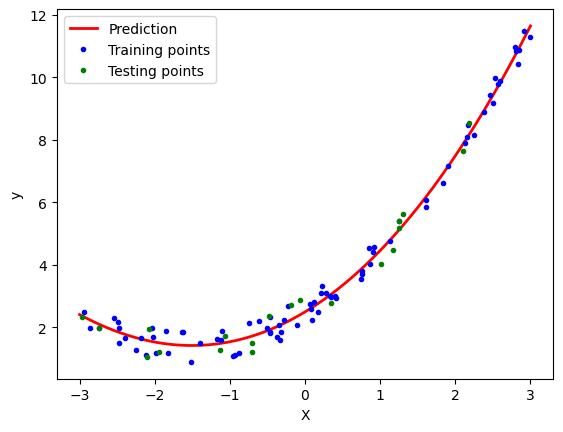

In [30]:
y_new = reg3.predict(X_new_poly)
plt.plot(X_new, y_new, "r-", linewidth=2, label='Prediction')
plt.plot(X_train, y_train, 'b.', label='Training points')
plt.plot(X_test, y_test, 'g.', label='Testing points')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()

## Pipeline

In [31]:
from sklearn.pipeline import Pipeline

In [37]:
def poly_regression(degree):
    X_new = np.linspace(-3, 3, 200).reshape(200, 1)
    poly = PolynomialFeatures(degree = degree, include_bias=True)
    lin_reg = LinearRegression()
    
    poly_regression = Pipeline([
        ('poly_features',poly),
        ('lin_reg',lin_reg)
    ])
    poly_regression.fit(X_train,y_train)
    y_pred_new = poly_regression.predict(X_new)
    
    #plotting prediction
    plt.plot(X_new, y_pred_new, 'r-', label='Degree' + str(degree), linewidth=2)
    plt.plot(X_train, y_train, 'b.', linewidth=3)
    plt.plot(X_train, y_train, 'g.', linewidth=3)
    plt.legend(loc='upper left')
    plt.xlabel('X')
    plt.ylabel('y')
    plt.axis([-4,4,0,10])
    plt.show()
    

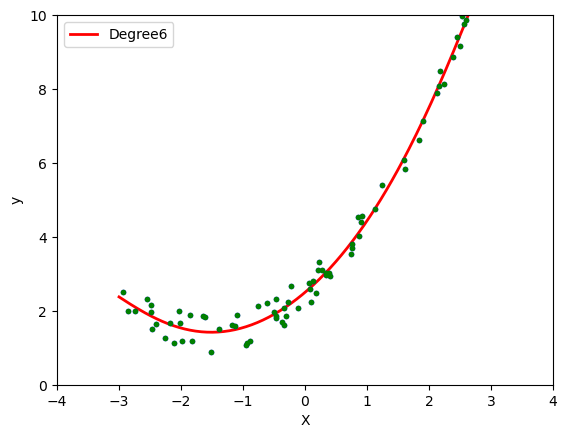

In [47]:
poly_regression(6)